<a href="https://colab.research.google.com/github/barauna-lo/Computational_Statistics/blob/main/HandsOn_10/CAP417_HandsOn10_Barauna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img src=https://raw.githubusercontent.com/barauna-lo/CAP4213-Deep-Learning/main/logoinpe.png align=”middle”>](https://www.gov.br/inpe/pt-br)

[<center><img src="https://github.com/barauna-lo/Deep-Learning/blob/main/LogoCAP.png?raw=true" width = 450 align="middle"></center>](http://www.inpe.br/posgraduacao/cap/)

# CAP 417 - PARTE C - HANDS-ON 02 - 2022

 Prof: Reinaldo Rosa 
 ---

 * [Luan Orion Baraúna](https://www.linkedin.com/in/luan-orion-barauna/)


Gerador de ST proveninente de Processo Browniano: bpst (brownian process time series)

In [1]:
!pip install colorednoise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


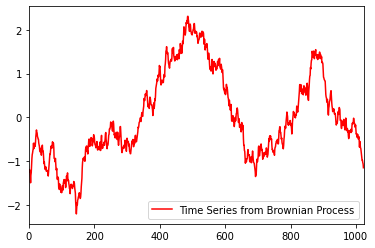

In [91]:
import matplotlib.pyplot as plt
import numpy as np
import colorednoise as cn
from matplotlib.pyplot import figure
import seaborn as sns
#o colorenoise é um típico gerador de ruído baseado na distribuição Gaussiana com
#lei de potencia. 
#Ref.: Timmer, J. and Koenig, M.: On generating power law noise. Astron. Astrophys. 300, 707-710 (1995) 

def normalizeSerie(s):
  serie = s.copy()
  serie = serie-np.average(serie)
  serie = serie/np.std(serie)
  return serie
#O Processo Browniano é um tipo de ruído da família 1/fˆ(beta)("Flicker Noise"), quando beta=2. 
#beta=0 caracteriza o ruído branco (White Noise) e beta=1 o ruído rosa (Pink Noise)
#por isso, o beta=2, é também conhecido como ruído Browniano ou ruído vermelho (Red Noise).
#Note que o termo "Browniano" não tem relação com a cor "Marrom", 
#mas sim com o nome do seu descobridor, o botânico Robert Brown "

beta=2
dataSize = 2**10
samplePlot =2**10
bpst = cn.powerlaw_psd_gaussian(beta,dataSize)
bpst = normalizeSerie(bpst)
plt.plot(bpst[:samplePlot],color='red',label="Time Series from Brownian Process")
plt.xlim(0,samplePlot)
plt.legend(loc=4)
plt.show()

Gerador de Séries Temporais Estocásticas VIA P-MODEL
(MODELO MULTIFRACTAL)

Simulação Endo: 0.525 < p < 0.675 ,  0.35 < beta < 0.45 (critério de Rosa-Sornette)

Simulação Exo: 0.675 < p < 0.975 ,  0.65 < beta < 0.75 (critério de Rosa-Sornette)

In [3]:
#pmodeltsg.py
#p-model from Meneveau & Sreenevasan, 1987 & Malara et al., 2016
#Author: R.R.Rosa & N. Joshi
#Version: 1.6
#Date: 11/04/2018
 
def pmodel(noValues=4096, p=0.4999, slope=[]):
    noOrders = int(np.ceil(np.log2(noValues)))
    noValuesGenerated = 2**noOrders
    
    y = np.array([1])
    for n in range(noOrders):
        y = next_step_1d(y, p)
    
    if (slope):
        fourierCoeff = fractal_spectrum_1d(noValues, slope/2)
        meanVal = np.mean(y)
        stdy = np.std(y)
        x = np.fft.ifft(y - meanVal)
        phase = np.angle(x)
        x = fourierCoeff*np.exp(1j*phase)
        x = np.fft.fft(x).real
        x *= stdy/np.std(x)
        x += meanVal
    else:
        x = y
    
    return x[0:noValues], y[0:noValues]
 
     
def next_step_1d(y, p):
    y2 = np.zeros(y.size*2)
    sign = np.random.rand(1, y.size) - 0.5
    sign /= np.abs(sign)
    y2[0:2*y.size:2] = y + sign*(1-2*p)*y
    y2[1:2*y.size+1:2] = y - sign*(1-2*p)*y
    
    return y2
 
 
def fractal_spectrum_1d(noValues, slope):
    ori_vector_size = noValues
    ori_half_size = ori_vector_size//2
    a = np.zeros(ori_vector_size)
    
    for t2 in range(ori_half_size):
        index = t2
        t4 = 1 + ori_vector_size - t2
        if (t4 >= ori_vector_size):
            t4 = t2
        coeff = (index + 1)**slope
        a[t2] = coeff
        a[t4] = coeff
        
    a[1] = 0
    
    return a

In [4]:
def plotpmodel(A, stype):
  plt.plot(A, color='blue', lw=0.5)
  if(stype == 1):
    plt.title("Endogenous Series")
  else:
    plt.title("Exogenous Series")
  plt.show()

In [5]:
# Number of series
N = 4 
# Lists to store edo and exo series
endoList = []
exoList = []

def getSeries(slist, pinterval, betainterval, n):
    pval = np.random.uniform(pinterval[0], pinterval[1], n)
    beta = np.random.uniform(betainterval[0], betainterval[1], n)
    for i in range(0,(n)):
        x, dx = pmodel(4096, pval[i], beta[i])
        slist.append((dx - np.mean(dx)) / np.std(dx)) 

#getSeries(endoList, [0.525,0.550], [0.35,0.38], 25) 
#getSeries(endoList, [0.550,0.575], [0.38,0.40], 25) 
#getSeries(endoList, [0.575,0.625], [0.40,0.42], 25) 
getSeries(endoList, [0.525,0.675], [0.35,0.45], N) # Simulação Endo: 0.525 < p < 0.675 , 0.35 < beta < 0.45 (critério de Rosa-Sornette)
#getSeries(exoList, [0.675,0.725], [0.65,0.75], 25)
#getSeries(exoList, [0.725,0.800], [0.65,0.75], 25) 
#getSeries(exoList, [0.800,0.875], [0.65,0.75], 25) 
getSeries(exoList, [0.675,0.975], [0.65,0.75], N) # Simulação Exo: 0.675 < p < 0.975 , 0.65 < beta < 0.75 (critério de Rosa-Sornette)

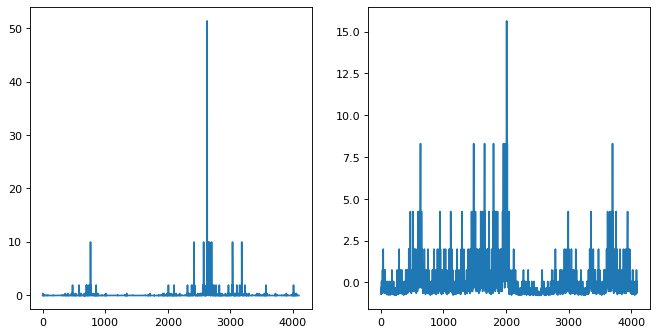

In [21]:
figure(figsize=(10,5),dpi=80)
plt.subplot(1,2,1)
plt.plot(exoList[0])
plt.subplot(1,2,2)
plt.plot(endoList[0])

In [7]:
def plotpmodel(A, stype):
  plt.plot(A, color='r', lw=0.1)
  if(stype == 1):
    plt.title("Endogenous Series")
  else:
    plt.title("Exogenous Series")
  plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Polygon
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.stats import norm, genextreme

from scipy.stats import skew, kurtosis

!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Para fins de testagem: o módulo abaixo gera uma série temporal com distribuição gaussiana.

In [9]:
mean, std = 0, 0.1 # mean and standard deviation
samples = 4096
A = np.random.normal(mean, std, size=samples)



---


## Gráfico de Cullen-Frey (GCF)

In [10]:
#Espaço de C&F para A
def cullenfrey(A, endoParams, exoParams):
    # Gaussian x Non-Gaussian (The Kullen-Frey Parameter Space)
    m=np.mean(A)
    std=np.std(A)
    s=skew(A)
    k1=kurtosis(A)
    k2=k1+3
    #Parâmetros de Cullen-Frey
    ss=s*s
    k=k2

    # Ploting Cullen-Frey Space
    plt.figure(num=None, figsize=(25, 25), dpi=100, facecolor='w', edgecolor='k')
    fig, ax = plt.subplots()
    maior = max(A)
    polyX1 = maior if maior > 4.4 else 4.4
    polyY1 = polyX1 + 1
    polyY2 = 3/2.*polyX1 + 3
    y_lim = polyY2 if polyY2 > 5 else 5
    #y_lim = max(exoParams['kurtosis'])

    x = [0, polyX1, polyX1, 0]
    y = [1, polyY1, polyY2, 3]
    scale = 1
    poly = Polygon(np.c_[x, y]*scale, facecolor='#1B9AAA', edgecolor='#1B9AAA', alpha=0.5)
    ax.add_patch(poly)

    ax.plot(0, 3, label="normal (Gaussian)", marker='^', c='magenta')
    ax.plot(ss, k, marker="*", c="green", label="Gaussian", linestyle='')
    ax.plot(endoParams['skewness'], endoParams['kurtosis'], marker="o", c="blue", label="Observation", linestyle='')
    ax.plot(exoParams['skewness'], exoParams['kurtosis'], marker="o", c="red", label="Observation", linestyle='')
    ax.plot(0, 4.187999875999753, label="logistic", marker='+', c='black')
    ax.plot(0, 1.7962675925351856, label ="uniform", marker='*', c='black')
    ax.plot(4, 9, label="exponential", marker='s', c='black')
    ax.plot(np.arange(0, polyX1, 0.1), 3/2. * np.arange(0, polyX1, 0.1) + 3, label="gamma", linestyle='-', c='black')
    ax.plot(np.arange(0, polyX1, 0.1), 2 * np.arange(0, polyX1, 0.1) + 3, label="lognormal", linestyle='-.', c='black')
    #ax.legend(loc='best')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.35), fancybox=True, shadow=True, ncol=3)
    ax.set_ylim((y_lim + 1), -1)
    ax.set_xlim(-1, (polyX1 + 1))
    plt.xlabel("Skewness²")
    plt.title("C&F Parameter Space (Green Area for Beta Function)")
    plt.ylabel("Kurtosis")

    plt.draw()


In [11]:
def getCFparams(slist):
  #k2list = np.empty((N), dtype=float)
  #sslist = np.empty((N), dtype=float)
  df = pd.DataFrame(np.zeros((N, 2)),columns = ['kurtosis', 'skewness'])
  for i in range(0, (N)):
    s=skew(slist[i])
    #Parâmetros de Cullen-Frey
    df['skewness'][i] = s*s
    df['kurtosis'][i] = kurtosis(slist[i])+3
  return df

<Figure size 2500x2500 with 0 Axes>

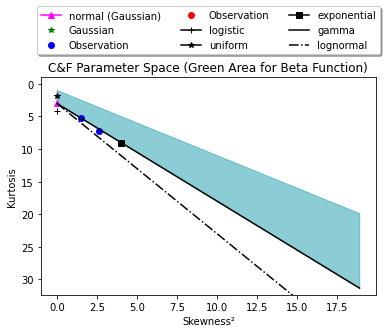

In [12]:
endoParams = getCFparams(endoList)
exoParams = getCFparams(exoList)

def main():
    maxIndex = np.argmax(endoParams['kurtosis'])
    #cullenfrey(A, [-99,-99], [-99,-99])
    cullenfrey(endoList[maxIndex], endoParams, exoParams)

    plt.show()
main()

# Task 2.1: 
## Gere Séries Temporais com beta=2
* (process Browniano gaussiano: 4 series)
* Endogenas (processo estocastico Não-Gaussiano: 4 series).


### Gerando Séries Brownianas $\beta = 2$

In [13]:
#Creating a Empty DataFrame
brownData = pd.DataFrame()
#SetUp a noise class
beta = 2
#Creat dataSize
dataSize = 2**10
for i in range(0,4):
  bpst = normalizeSerie(cn.powerlaw_psd_gaussian(beta,dataSize))
  brownData.insert(i,str(i),bpst) #insert new collums

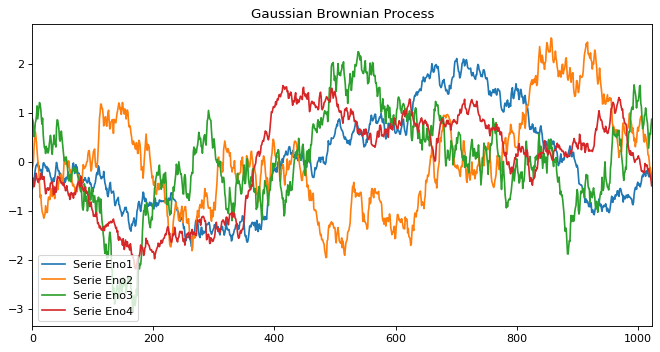

In [14]:
from matplotlib.pyplot import figure
figure(figsize=(10,5),dpi=80)
for i in range(0,4): 
  plt.plot(brownData[str(i)][:samplePlot],label="Serie Eno"+str(i+1))
plt.xlim(0,samplePlot)
plt.legend(loc=3) #location of the legend
plt.title("Gaussian Brownian Process")
plt.show()


## Gerando Séries Exogenas

In [80]:
# #Gerando Séries Exógenas Utilizando o p-model

# pserie=[]
# for i in range(4):
#     A,B  = pmodel(4096, np.random.uniform(0.675,0.975), np.random.uniform(0.65,0.75))
#     C=(A - np.mean(A)) / np.std(A)
#     pserie.append(C)

# exoData = pd.DataFrame() #Criando um espaço de dataframa

# for i in range(len(pserie)): exoData.insert(i,str(i),pserie[i]) #Alocando as séries    

In [88]:
#Utilizando as funções geradas acimas
exoSeries =[]
getSeries(exoSeries, [0.8,0.975], [0.65,0.75], N) # Simulação Exo: 0.675 < p < 0.975 , 0.65 < beta < 0.75 (critério de Rosa-Sornette)

exoData = pd.DataFrame() #Criando um espaço de dataframa

for i in range(len(exoSeries)): exoData.insert(i,str(i),exoSeries[i]) #Alocando as séries


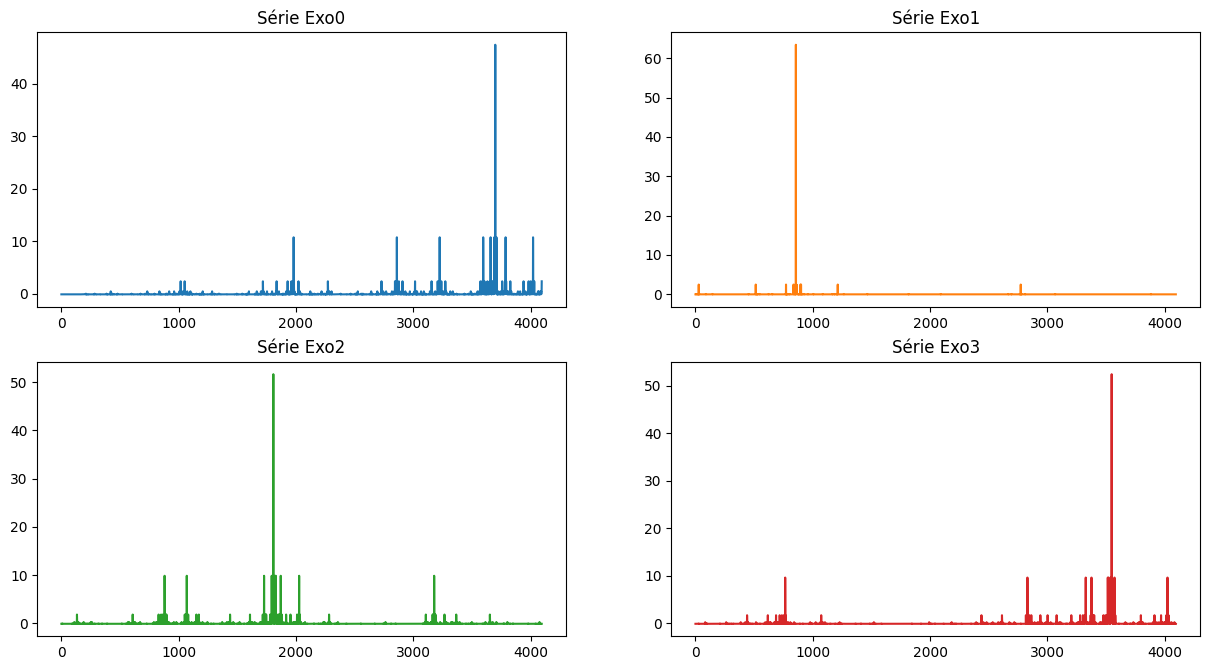

In [90]:
figure(figsize=(15,8),dpi=100)
for i in range(0,4): 
  plt.subplot(2,2,(i+1))
  plt.plot(exoData[str(i)],color='C'+str(i))
  plt.title('Série Exo'+str(i))
plt.show()  

# Task 2.2: 
Inclua a Area do GEV no GCF e Encontre nele os modelos de PDF para as 8 séries geradas).

Para incluir o GEV é necessário realizar uma extrapolação na função. Para isso iremos redefiní-la aqui.


In [86]:
#Espaço de C&F para A
def cullenfreyGEV(A):
    # Gaussian x Non-Gaussian (The Kullen-Frey Parameter Space)
    m=A.mean()
    std=A.std()
    s=A.skew()
    k1=A.kurtosis()
    k2=k1+3
    #Parâmetros de Cullen-Frey
    ss=s*s
    k=k2

    # Ploting Cullen-Frey Space
    plt.figure(num=None, figsize=(25, 25), dpi=100, facecolor='w', edgecolor='k')
    fig, ax = plt.subplots()
    maior = np.max([ss,k])

    polyX1 = maior if maior > 4.4 else 4.4
    polyY1 = polyX1 + 1
    polyY2 = 3/2.*polyX1 + 3
    y_lim = polyY2 if polyY2 > 5 else 5
    #y_lim = max(exoParams['kurtosis'])

    x = [0, polyX1, polyX1, 0]
    y = [1, polyY1, polyY2, 3]

    poly2X1 = maior if maior > 2.15 else 2.15
    # EXTRAPLAÇÃO
    poly2Y2 = 2.62*polyX1 + 3
    xGEV = [0, polyX1, polyX1, 0]
    yGEV = [3, polyY2, poly2Y2, 3]    
    
    scale = 1
    poly = Polygon(np.c_[x, y]*scale, facecolor='#1B9AAA', edgecolor='#1B9AAA', alpha=0.5,label='β')
    ax.add_patch(poly)

    polyGEV = Polygon(np.c_[xGEV, yGEV]*scale, facecolor='red', edgecolor='red', alpha=0.5, label='GEV')
    ax.add_patch(polyGEV)

    
    # # poly2X1 = maior if maior > 2.15 else 2.15
    # poly2Y2 = 2.62*polyX1 + 3
    # x2 = [0, polyX1, polyX1, 0]
    # y2 = [3, polyY2, poly2Y2, 3]

    #ax.plot(x=x2, y=y2, fill="toself", name = "GEV")
    ax.plot(0, 3, label="Gaussian", marker='*', c='magenta')
    # ax.plot(ss, k, marker="o", c="green", label="Gaussian", linestyle='')
    ax.plot(ss,k, marker="o", c="blue", label="Observation", linestyle='')
    #ax.plot(exoParams['skewness'], exoParams['kurtosis'], marker="o", c="red", label="Observation", linestyle='')
    ax.plot(0, 4.187999875999753, label="logistic", marker='+', c='black')
    ax.plot(0, 1.7962675925351856, label ="uniform", marker='*', c='black')
    ax.plot(4, 9, label="exponential", marker='s', c='black')
    ax.plot(np.arange(0, polyX1, 0.1), 3/2. * np.arange(0, polyX1, 0.1) + 3, label="gamma", linestyle='-', c='black')
    ax.plot(np.arange(0, polyX1, 0.1), 2 * np.arange(0, polyX1, 0.1) + 3, label="lognormal", linestyle='-.', c='black')
    ax.legend(loc='best')
    #ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.35), fancybox=True, shadow=True, ncol=3)
    #ax.set_ylim((y_lim +5), .3)
    #ax.set_xlim(-.1, (polyX1 + 0.3))
    ax.set_ylim(ax.get_ylim()[::-1])   #https://stackoverflow.com/questions/2051744/reverse-y-axis-in-pyplot
    plt.xlabel("Skewness²")
    #plt.title("C&F Parameter Space (Green Area for β Function)")
    plt.ylabel("Kurtosis")

    #plt.plot()

[]

<Figure size 2500x2500 with 0 Axes>

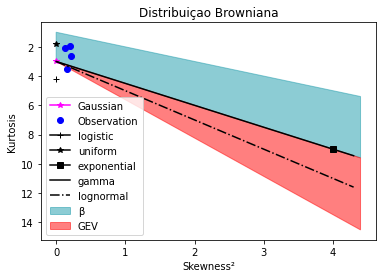

<Figure size 2500x2500 with 0 Axes>

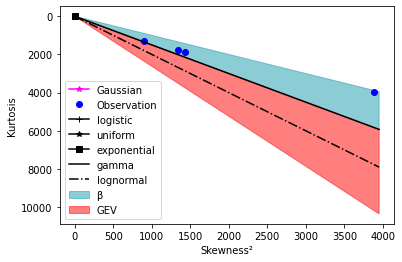

In [89]:
cullenfreyGEV(brownData)
plt.title("Distribuiçao Browniana")
plt.plot()
cullenfreyGEV(exoData)
plt.plot()

# Task 2.3: 
Com base na caracterização de modelos obtida em 2.2., plote o Histograma de cada serie e obtenha o modelo parametrizado a partir do ajuste sobre o histograma.  Note que para isso voce deverá implementar a PDF do modelo caracterizado no GCF em um módulo abaixo. 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

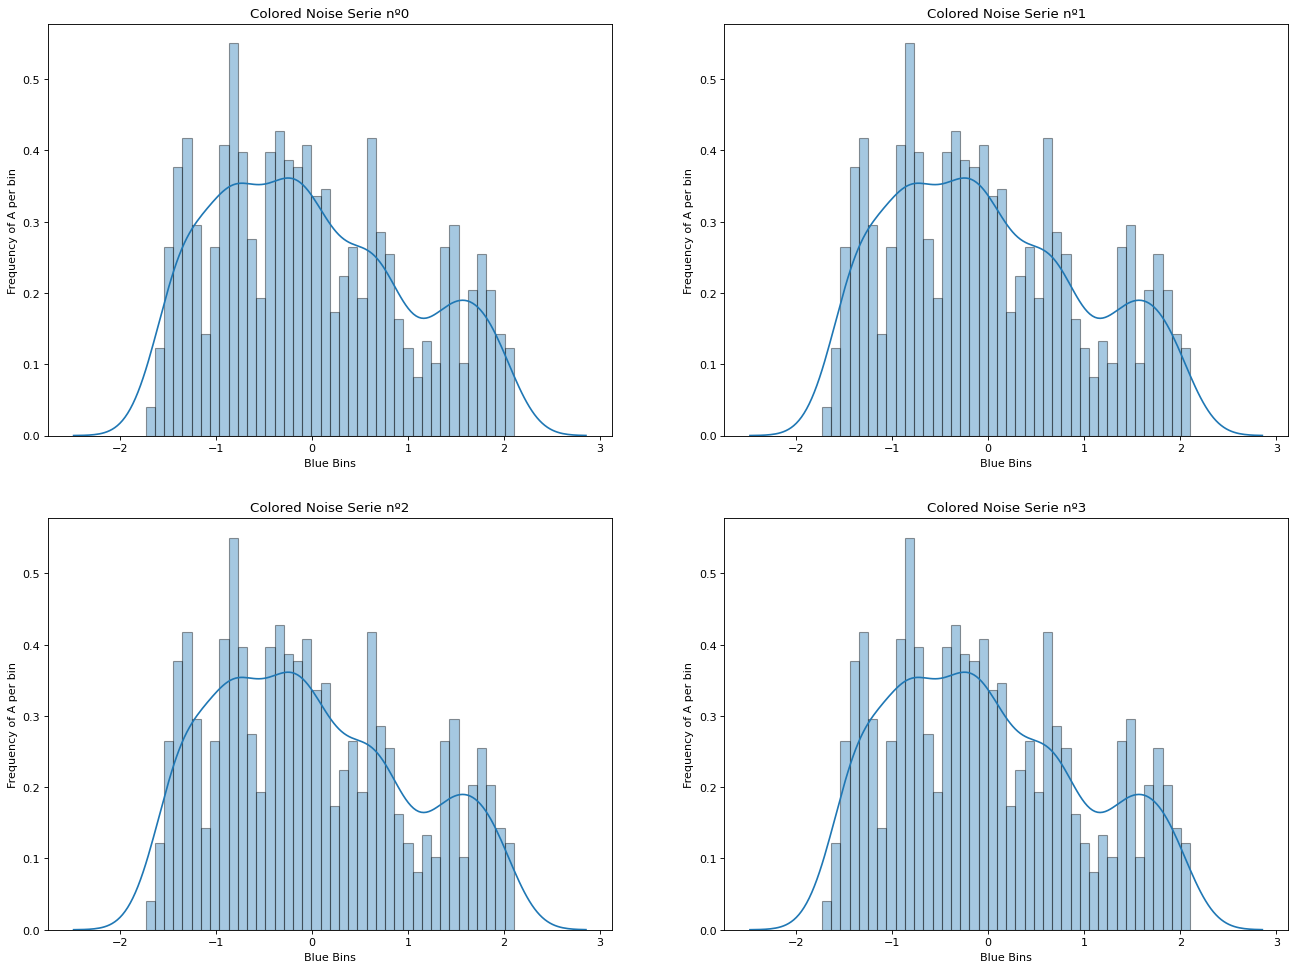

In [98]:

# seaborn histogram with Kernel Density Estimation
figure(figsize=(20,15),dpi=80)

for i in range(4):
  plt.subplot(2,2,(i+1))
  sns.distplot(brownData['0'], bins=40, hist_kws={'edgecolor':'black'})
  plt.ylabel('Frequency of A per bin')
  plt.xlabel('Blue Bins')
  plt.title('Colored Noise Serie nº'+str(i))

# plt.subplot(1,2,2)
# sns.distplot(exoData['0'], bins=40, hist_kws={'edgecolor':'black'})
# plt.ylabel('Frequency of A per bin')
# plt.xlabel('Blue Bins')
# plt.title('Exo')

plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

[]

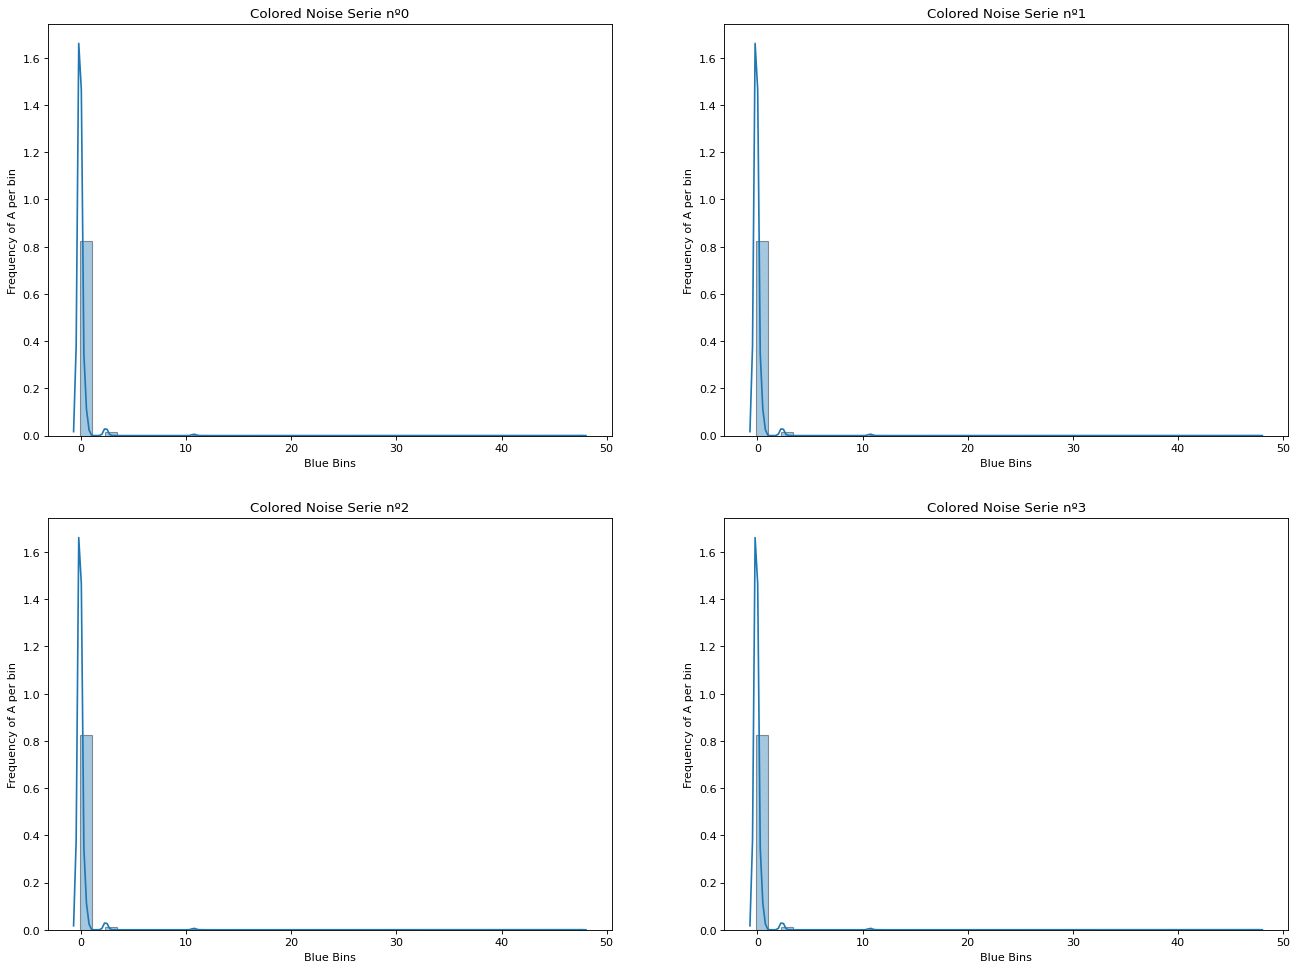

In [100]:
figure(figsize=(20,15),dpi=80)

for i in range(4):
  plt.subplot(2,2,(i+1))
  sns.distplot(exoData['0'], bins=40, hist_kws={'edgecolor':'black'})
  plt.ylabel('Frequency of A per bin')
  plt.xlabel('Blue Bins')
  plt.title('Colored Noise Serie nº'+str(i))
plt.plot()  